# 1. Library Import

In [1]:
# First let's import the required libraries for multiple linear regression

# numpy is used for processing our arrays
import numpy as np

# matplotlib for visualizations
import matplotlib.pyplot as plt

# more fun visualizations based on matplotlib
import seaborn as sns

# and pandas for data import
import pandas as pd

# 2. Data Import

In [2]:
# Next, we need to import our dataset.  
# Source https://www.kaggle.com/amrut11/multiple-linear-regression-on-50-startups-dataset/data

# First import the CSV into a Pandas Dataframe
dataset = pd.read_csv('50_Startups.csv')

# check to see if there is any missing data... if not we can proceed to step 3
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
# get a nice summary of hte columns and rows, to see how big the dataset is
dataset.shape

# 50 rows and 5 columns

(50, 5)

In [4]:
# Next, vertical split the data into the independent variable features
X = dataset.iloc[:,:-1].values

# and the dependent variable vector y
y = dataset.iloc[:,-1].values

# show X
X

# show y
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

<AxesSubplot:>

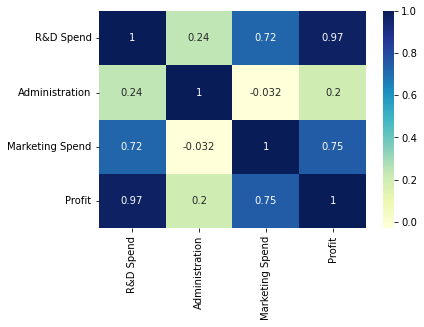

In [15]:
# Lets take a look at the heatmap
sns.heatmap(dataset.corr(),cmap="YlGnBu", annot=True)

# 3. Categorical Data Encode
**Encode the independent variable**

In [6]:
# Since, the dataset includes categorical data, categetories such as the state name
# we need to numerically encode it so we can process it with our ML algorithm

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# The categorical data appears in the 4th column so we set the index to [3] since Python
# is zero indexed

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [3])],remainder='passthrough')
X = ct.fit_transform(X)

# 4. Data Split

In [7]:
#  Now that the data is encoded, we can HORIZONTALLY split the dataframe into a training and test set.
# The training set will include the independent and dependent variable rows which we will
# feed the ML algorithm so it can learn the relationships between the data columns

# Then once we the ML alogorithm learns the relationships, we can supply a new set of UNSEEN 
# indendent variables to the ML model and have it make predictions that, if are close to the dependent
# variable rows in the test set, indicate the alogorithm is accurate!

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. Model Training

In [8]:
# the process of training is known as FITTING the data because we are trying to "fit" a straight
# line through the data in such a way that it is the touches as many plotted points as possible
# but without bending

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

# 6. Predicting the Test Set

In [9]:
# We can predict that a California startup spending 150k on R&D and Admin as well as 300k on marketing
# will produce about 175k in profit.

regr.predict([[1,0,0, 150000, 150000,300000]])

array([174489.94391725])

In [10]:
# Cool, but is it accurate?  Let's see

y_pred = regr.predict(X_test)
np.set_printoptions(precision=2)
np.concatenate((
                  y_pred.reshape(len(y_pred),1), 
                  y_test.reshape(len(y_test),1)
                ),1)

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

In [11]:
pd.DataFrame({'Actual Value':y_test,
              'Predicted Value':y_pred,
              'Difference': y_test-y_pred})[0:10]

,Actual Value,Predicted Value,Difference
0,103282.38,103015.201598,267.178402
1,144259.40,132582.277608,11677.122392
2,146121.95,132447.738452,13674.211548
3,77798.83,71976.098513,5822.731487
4,191050.39,178537.482211,12512.907789
5,105008.31,116161.242302,-11152.932302
6,81229.06,67851.692097,13377.367903
7,97483.56,98791.733747,-1308.173747
8,110352.25,113969.435330,-3617.185330
9,166187.94,167921.065696,-1733.125696


In [12]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9293749209318047